In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url_train = 'scales.csv' #traing dataset
url_dict = './Dataset/Data_Dictionary.xlsx' #data dictionary

In [3]:
## making dataframe

df_train = pd.read_csv(url_train)
df_dict = pd.read_excel(url_dict)

In [5]:
df_train = df_train.iloc[:,1:]
df_train.head()

,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV,Assigned Line
0,0.052678,0.352363,0.784935,0.610371,0.013736,0.539663,0.546310,0.602782,0.37204,0.110944,0.493103,0.013089,0.022942,0.009853,0.652225,0.624607,0.670784,0.000000,0.149446,Low
1,0.411924,0.046913,0.697432,0.008736,0.303597,0.647431,0.633930,0.244478,0.15774,0.694726,0.145534,0.543781,0.022942,0.539310,0.681579,0.648578,0.000000,0.701962,0.705285,High
2,0.792935,0.749787,0.085767,0.402600,0.303597,0.278243,0.284126,0.570605,0.37204,0.156299,0.832524,0.432130,0.022942,0.380423,0.251066,0.282626,0.000000,0.000000,0.113386,Medium
3,0.300332,0.745787,0.694903,0.755846,0.379658,0.371070,0.322568,0.108738,0.37204,0.644195,0.664108,0.410747,0.022942,0.427424,0.383629,0.750346,0.670784,0.000000,0.680196,Low
4,0.425277,0.212242,0.643990,0.619695,0.137710,0.657461,0.660990,0.817201,0.37204,0.694785,0.832524,0.580546,0.640460,0.590135,0.658431,0.269008,0.670784,0.000000,0.177682,High


In [ ]:
column = df_dict['Variable Name'][:21]
column 

In [ ]:
df_train.columns = column  #naming the dataframe columns
df_train.head()

### SelectKBest

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
X = df_train.iloc[:,:-1]  #independent columns
y = df_train.iloc[:,-1]   #target column 

In [10]:
X.head()

,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV
0,0.052678,0.352363,0.784935,0.610371,0.013736,0.539663,0.546310,0.602782,0.37204,0.110944,0.493103,0.013089,0.022942,0.009853,0.652225,0.624607,0.670784,0.000000,0.149446
1,0.411924,0.046913,0.697432,0.008736,0.303597,0.647431,0.633930,0.244478,0.15774,0.694726,0.145534,0.543781,0.022942,0.539310,0.681579,0.648578,0.000000,0.701962,0.705285
2,0.792935,0.749787,0.085767,0.402600,0.303597,0.278243,0.284126,0.570605,0.37204,0.156299,0.832524,0.432130,0.022942,0.380423,0.251066,0.282626,0.000000,0.000000,0.113386
3,0.300332,0.745787,0.694903,0.755846,0.379658,0.371070,0.322568,0.108738,0.37204,0.644195,0.664108,0.410747,0.022942,0.427424,0.383629,0.750346,0.670784,0.000000,0.680196
4,0.425277,0.212242,0.643990,0.619695,0.137710,0.657461,0.660990,0.817201,0.37204,0.694785,0.832524,0.580546,0.640460,0.590135,0.658431,0.269008,0.670784,0.000000,0.177682


In [11]:
y.head()

0       Low
1      High
2    Medium
3       Low
4      High
Name: Assigned Line, dtype: object

In [ ]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [ ]:
for i in X.columns[0:-1]:
    X[i] = normalize(X[i])

In [ ]:
for i in X.columns[0:-1]:
    plt.figure()
    X.hist(column=i,figsize=(7,5))

In [12]:
bestfeatures = SelectKBest(score_func=chi2, k=15)

In [13]:
fit = bestfeatures.fit(X,y)

In [14]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [15]:
print(featureScores.nlargest(15,'Score'))

                   Specs      Score
1       Business Revenue  91.822687
0                   FICO  89.856101
2                    TSR  87.401490
11  preferred_spend_line  51.101342
4                 Income  47.788845
10    Months in Business  45.100338
13    preferred_bal_line  42.394753
17          isChargeCust  38.200065
15     External_rev_rate  35.857073
16   Supplementary Cards  31.750487
5      Last 6M Avg Remit  29.655143
6        Last 6M Avg Bal  27.292258
14    preavgremit1_3_all  24.199841
18                   CMV  18.606892
12           total_cards  14.192720


### Feature Importance using a model

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06479553 0.06418531 0.06267031 0.0510909  0.06171992 0.05563714
 0.05502458 0.05545555 0.03116567 0.05843318 0.05978353 0.05783405
 0.03465722 0.05765273 0.05484736 0.05681516 0.03149701 0.01520993
 0.07152491]


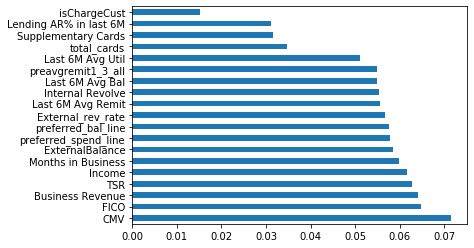

In [18]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

In [19]:
ETC = pd.DataFrame(feat_importances)
#ETC

### Cor-relation factor

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
#X[:, 11] = labelencoder_X.fit_transform(X[:, 11])

labelencoder_y = LabelEncoder()#
#df_train['VAR21'] = labelencoder_y.fit_transform(df_train['VAR21'])

In [ ]:
df_train['VAR21'].head()

In [ ]:
df = df_train.iloc[:,2:]

In [ ]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Recursive Feature Elimination with Logistic Regression

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [21]:
model_log = LogisticRegression() 
rfe = RFE(model, 15)

In [22]:
fit = rfe.fit(X, y)

In [23]:
print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 15
Selected Features: [ True  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True False False  True]
Feature Ranking: [1 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 4 5 1]


In [24]:
feat_selected = pd.DataFrame({'slected':fit.support_, 'variable':X.columns})
feat_selected

,slected,variable
0,True,FICO
1,True,Business Revenue
2,True,TSR
3,True,Last 6M Avg Util
4,True,Income
5,True,Last 6M Avg Remit
6,True,Last 6M Avg Bal
7,True,Internal Revolve
8,False,Lending AR% in last 6M
9,True,ExternalBalance


### Principle Component Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5) 

In [ ]:
fit = pca.fit(X)

In [ ]:
print("Explained Variance:", fit.explained_variance_ratio_)

In [ ]:
print(fit.components_)

### Feature Importance using Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [26]:
X.head()

,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV
0,0.052678,0.352363,0.784935,0.610371,0.013736,0.539663,0.546310,0.602782,0.37204,0.110944,0.493103,0.013089,0.022942,0.009853,0.652225,0.624607,0.670784,0.000000,0.149446
1,0.411924,0.046913,0.697432,0.008736,0.303597,0.647431,0.633930,0.244478,0.15774,0.694726,0.145534,0.543781,0.022942,0.539310,0.681579,0.648578,0.000000,0.701962,0.705285
2,0.792935,0.749787,0.085767,0.402600,0.303597,0.278243,0.284126,0.570605,0.37204,0.156299,0.832524,0.432130,0.022942,0.380423,0.251066,0.282626,0.000000,0.000000,0.113386
3,0.300332,0.745787,0.694903,0.755846,0.379658,0.371070,0.322568,0.108738,0.37204,0.644195,0.664108,0.410747,0.022942,0.427424,0.383629,0.750346,0.670784,0.000000,0.680196
4,0.425277,0.212242,0.643990,0.619695,0.137710,0.657461,0.660990,0.817201,0.37204,0.694785,0.832524,0.580546,0.640460,0.590135,0.658431,0.269008,0.670784,0.000000,0.177682


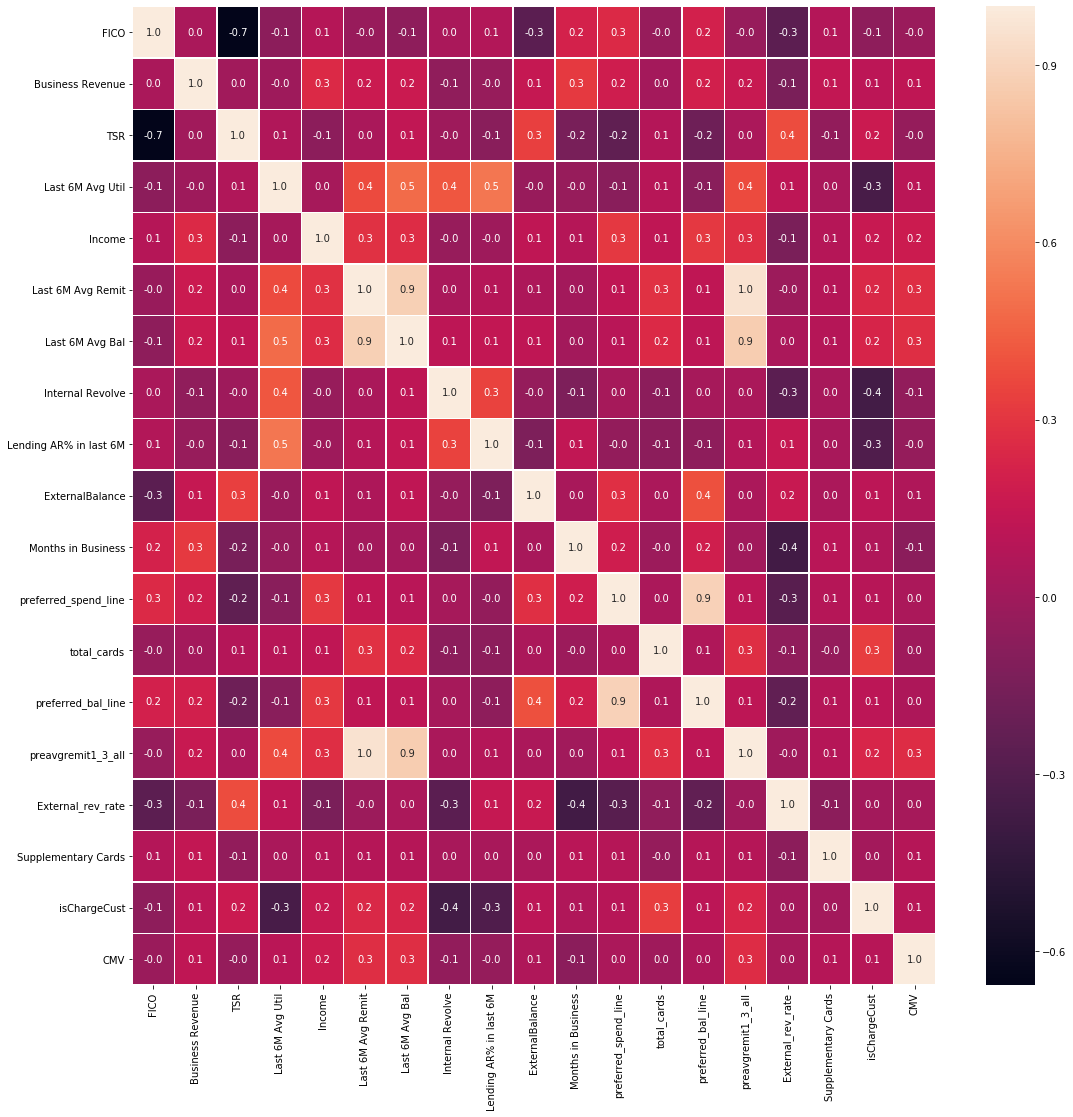

In [27]:
#correlation map of independent variable
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [28]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.5256862745098039


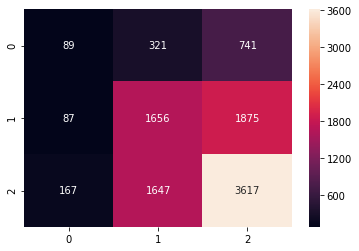

In [30]:
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [31]:
# find best scored 15 features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [32]:
select_feature.scores_

array([63.37654614, 65.04644758, 62.53656283,  3.54011422, 31.81931477,
       22.71368489, 22.4973268 ,  2.02227022,  1.1568436 ,  8.97876775,
       28.34763466, 39.55732789,  7.20499   , 31.6556459 , 18.46214469,
       27.26243541, 22.70512757, 25.38294374, 12.77678791])

In [33]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [63.37654614 65.04644758 62.53656283  3.54011422 31.81931477 22.71368489
 22.4973268   2.02227022  1.1568436   8.97876775 28.34763466 39.55732789
  7.20499    31.6556459  18.46214469 27.26243541 22.70512757 25.38294374
 12.77678791]
Feature list: Index(['FICO', 'Business Revenue', 'TSR', 'Last 6M Avg Util', 'Income',
       'Last 6M Avg Remit', 'Last 6M Avg Bal', 'Internal Revolve',
       'Lending AR% in last 6M', 'ExternalBalance', 'Months in Business',
       'preferred_spend_line', 'total_cards', 'preferred_bal_line',
       'preavgremit1_3_all', 'External_rev_rate', 'Supplementary Cards',
       'isChargeCust', 'CMV'],
      dtype='object')


In [34]:
dfscoresrf = pd.DataFrame(select_feature.scores_)
dfcolumnsrf = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization 
featureScoresrf = pd.concat([dfcolumnsrf,dfscoresrf],axis=1)
featureScoresrf.columns = ['Specs','Score']  #naming the dataframe columns

In [35]:
print(featureScoresrf.nlargest(12,'Score'))

                   Specs      Score
1       Business Revenue  65.046448
0                   FICO  63.376546
2                    TSR  62.536563
11  preferred_spend_line  39.557328
4                 Income  31.819315
13    preferred_bal_line  31.655646
10    Months in Business  28.347635
15     External_rev_rate  27.262435
17          isChargeCust  25.382944
5      Last 6M Avg Remit  22.713685
16   Supplementary Cards  22.705128
6        Last 6M Avg Bal  22.497327


In [36]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

In [37]:
#x_train_2.columns

In [38]:
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.4992156862745098


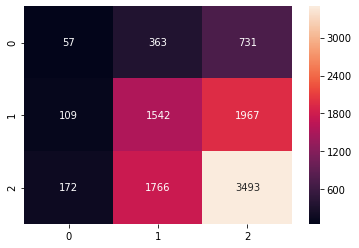

In [39]:
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

### Recursive Feature Elimination with Random Forest

In [40]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=12, step=1)
rfe = rfe.fit(x_train, y_train)

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPA

In [41]:
best15 = x_train.columns[rfe.support_]
print('Chosen best 15 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['FICO', 'Business Revenue', 'TSR', 'Last 6M Avg Remit',
       'Last 6M Avg Bal', 'Internal Revolve', 'ExternalBalance',
       'Months in Business', 'preferred_spend_line', 'preavgremit1_3_all',
       'External_rev_rate', 'CMV'],
      dtype='object')


##### Recursive Feature Elimination with Random Forest and Cross Validation

In [42]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPA

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPA

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\PASHUPA

Optimal number of features : 17
Best features : Index(['FICO', 'Business Revenue', 'TSR', 'Last 6M Avg Util', 'Income',
       'Last 6M Avg Remit', 'Last 6M Avg Bal', 'Internal Revolve',
       'Lending AR% in last 6M', 'ExternalBalance', 'Months in Business',
       'preferred_spend_line', 'total_cards', 'preferred_bal_line',
       'preavgremit1_3_all', 'External_rev_rate', 'CMV'],
      dtype='object')


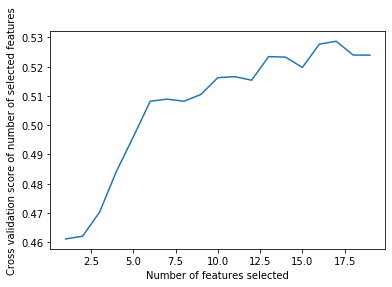

In [43]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Tree based feature selection

In [44]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 18 (0.089351)
2. feature 0 (0.067961)
3. feature 9 (0.066743)
4. feature 1 (0.062174)
5. feature 6 (0.061613)
6. feature 15 (0.060522)
7. feature 5 (0.060215)
8. feature 13 (0.060143)
9. feature 11 (0.059552)
10. feature 10 (0.059311)
11. feature 4 (0.058725)
12. feature 7 (0.058562)
13. feature 14 (0.058386)
14. feature 2 (0.058106)
15. feature 3 (0.052967)
16. feature 8 (0.025509)
17. feature 12 (0.020088)
18. feature 16 (0.013931)
19. feature 17 (0.006141)


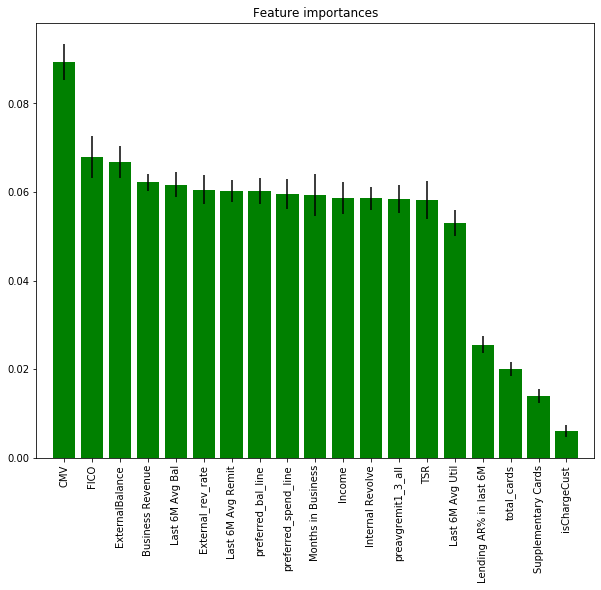

In [45]:
# Plot the feature importances of the forest

plt.figure(1, figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### Feature Extraction using PCA

In [46]:
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

In [47]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'explained_variance_ratio_')

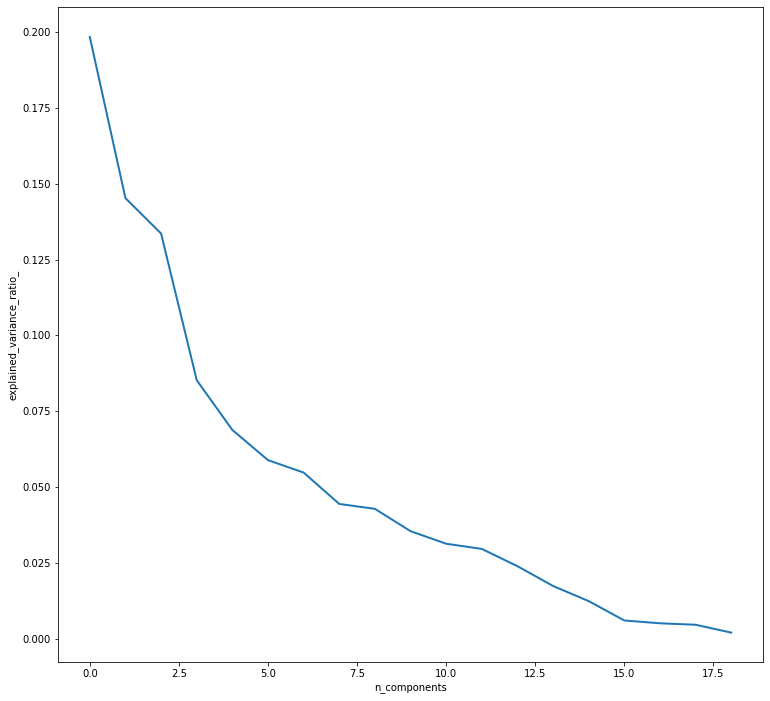

In [48]:
plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [ ]:
wn_feature_drop_list = ['Lending AR% in last 6M', 'total_cards', 'preavgremit1_3_all', 'Last 6M Avg Util', 
                        'Last 6M Avg Remit', 'isChargeCust']

In [ ]:
top15feat = ['FICO', 'Business Revenue', 'TSR', 'Last 6M Avg Util', 'Income',
       'Last 6M Avg Remit', 'Internal Revolve', 'ExternalBalance',
       'Months in Business', 'preferred_spend_line', 'total_cards',
       'preferred_bal_line', 'preavgremit1_3_all', 'External_rev_rate', 'CMV'] #RFEWRF

In [49]:
X_exp = X

In [50]:
print(X_exp.shape, len(best15))
best12 = best15.tolist()
print(best12)

(34000, 19) 12
['FICO', 'Business Revenue', 'TSR', 'Last 6M Avg Remit', 'Last 6M Avg Bal', 'Internal Revolve', 'ExternalBalance', 'Months in Business', 'preferred_spend_line', 'preavgremit1_3_all', 'External_rev_rate', 'CMV']


In [51]:
cols = X_exp.columns.tolist()
print(cols)
print(best12)
remove = []

for i in cols:
    if i not in best12:
        remove.append(i);

print(remove)

['FICO', 'Business Revenue', 'TSR', 'Last 6M Avg Util', 'Income', 'Last 6M Avg Remit', 'Last 6M Avg Bal', 'Internal Revolve', 'Lending AR% in last 6M', 'ExternalBalance', 'Months in Business', 'preferred_spend_line', 'total_cards', 'preferred_bal_line', 'preavgremit1_3_all', 'External_rev_rate', 'Supplementary Cards', 'isChargeCust', 'CMV']
['FICO', 'Business Revenue', 'TSR', 'Last 6M Avg Remit', 'Last 6M Avg Bal', 'Internal Revolve', 'ExternalBalance', 'Months in Business', 'preferred_spend_line', 'preavgremit1_3_all', 'External_rev_rate', 'CMV']
['Last 6M Avg Util', 'Income', 'Lending AR% in last 6M', 'total_cards', 'preferred_bal_line', 'Supplementary Cards', 'isChargeCust']


In [52]:
X_exp.shape

(34000, 19)

In [53]:
X_new = X_exp.drop(remove,axis = 1)

In [54]:
X_new.shape

(34000, 12)

In [55]:
y_new = y

In [56]:
y_new.shape

(34000,)

In [57]:
# label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
#X[:, 11] = labelencoder_X.fit_transform(X[:, 11])

labelencoder_y = LabelEncoder()
y_new = labelencoder_y.fit_transform(y_new)

In [58]:
y_new

array([1, 0, 2, ..., 1, 1, 0])

In [59]:
# split data train 70 % and test 30 %
nx_train, nx_test, ny_train, ny_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [60]:
#random forest classifier with n_estimators=10 (default)
nclf_rf = RandomForestClassifier(random_state=43)      
nclr_rf = nclf_rf.fit(nx_train,ny_train)

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.5135294117647059


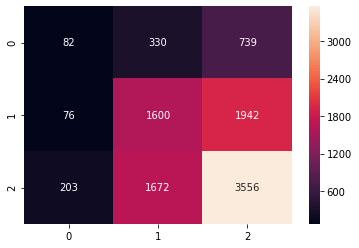

In [61]:
ac = accuracy_score(ny_test,nclf_rf.predict(nx_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(ny_test,nclf_rf.predict(nx_test))
sns.heatmap(cm,annot=True,fmt="d")